<a href="https://colab.research.google.com/github/saurabhaloneai/Pytorch-complete/blob/main/pytorch_day_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


torch.__version__

'2.1.0+cu118'

In [3]:
# DATA creating

In [4]:
#creating parameter
weights = 0.7
bias =0.3


start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) #it adds extra dimension
y = X * weights + bias

In [5]:
print(X[:10],y[:10],len(X),len(y))

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]) 50 50


In [6]:
#splitting data into test and training set

train_split = int(0.8 * len(X))

X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [7]:
#visualise

def plot(train_data = X_train,train_labels=y_train,test_data = X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  plt.scatter(test_data,test_labels,c="r",s=4,label="Trainig data")

  if predictions is not None :
    plt.scatter(test_data,predictions, c = "g",s=4 , label = "prediction")

  plt.legend(prop={"size":14});


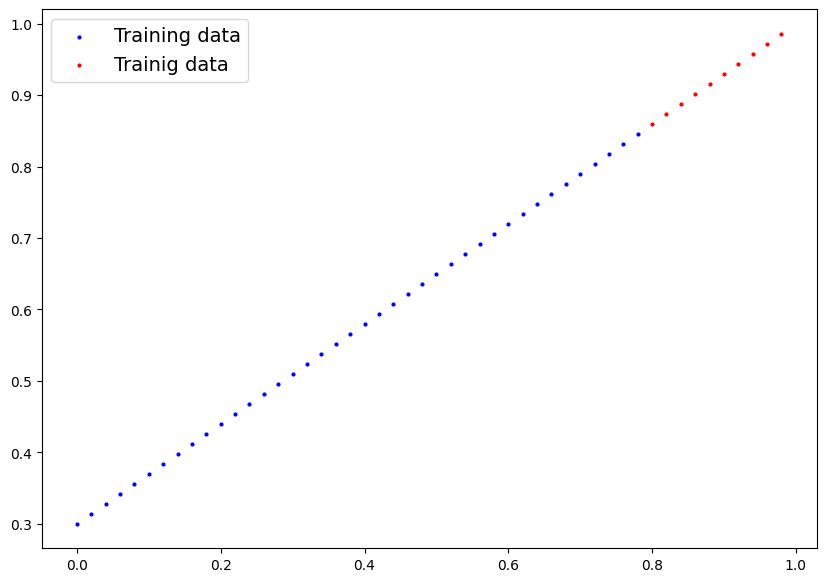

In [8]:
plot()

In [9]:
#time to build model
# linear regression

class LinearRegressionModel(nn.Module):
   def __init__(self):
     super().__init__()
     self.weights = nn.Parameter(torch.rand(1,requires_grad= True , dtype=torch.float))
     self.bias = nn.Parameter(torch.rand(1,requires_grad=True,dtype=torch.float))


   def forward(self, x:torch.tensor)-> torch.Tensor:


    return self.weights * x + self.bias


## WHat is going on ?
1. torch.nn - it is the place where all pytorch model live**
2. troch.nn.parameter - this basically that we fidning out but this will be already writtenunder the layer
3. torch.optim - this is where all optimizer is gonna be
4. def forward - > this is where we are going to write computation of our function ex y = {w*x +b} the part under curly brackets

In [10]:
#set seed
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [12]:
X_test , y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [13]:
y_preds = model_0(X_test)
y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]], grad_fn=<AddBackward0>)

'torch.infernce_mode()' it keeps the tarck of the all gradient of each parameter in inference we don't need any track of this cuase we are not training.... it later they used in backpropagation and so on... this helpful while we are doing the Predcitions

In [14]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

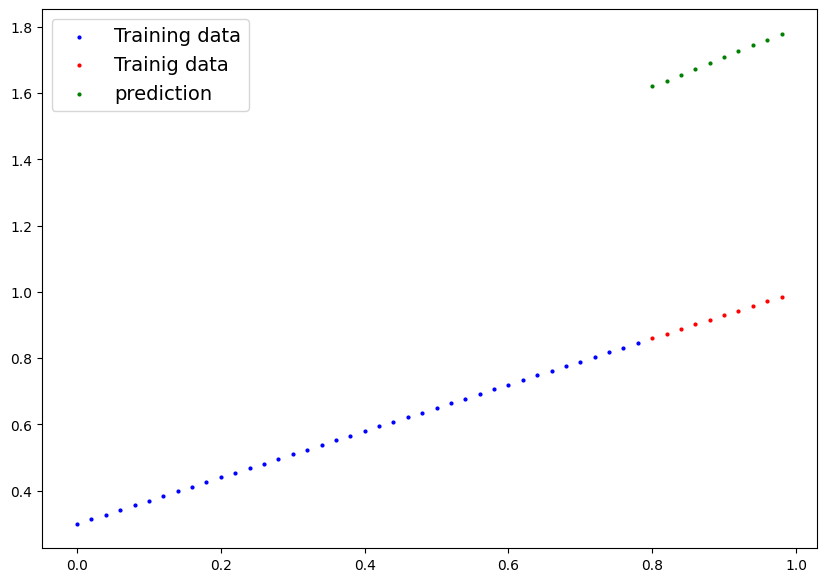

In [15]:
plot(predictions=y_preds)

In [16]:
#training

In [17]:
#setup loss function
loss_fn = nn.L1Loss()

#optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [18]:
# Building the training loop and testing loop
'''

0. Loop through data
1. Forward pass passing thorugh y = wx + b
2. calculate the loss
3. optimizer with zero grad
4. Backward pass
5. optimizer step - adjust the params with repesct to loss function

'''

'\n\n0. Loop through data \n1. Forward pass passing thorugh y = wx + b\n2. calculate the loss \n3. optimizer with zero grad  \n4. Backward pass \n5. optimizer step - adjust the params with repesct to loss function\n\n'

Training and Testing Loop :)

In [30]:
# finally training loop

epochs = 200

## Experiement tracking

epoch_count =[]

train_losss =[]

test_losss = []

# Loop

for epoch in range(epochs) :

   model_0.train() # it set all paramter of model that requires gradient to require gradient # it does all th work of setting model to save backward pass things |

   y_pred = model_0(X_train)

   loss = loss_fn(y_pred , y_train)

   optimizer.zero_grad()

   loss.backward()

   optimizer.step()

#testing loop
   model_0.eval()

   with torch.inference_mode():

     y_test_pred = model_0(X_test)

     test_loss = loss_fn(y_test_pred , y_test)

   if epoch % 10 == 0 :

    epoch_count.append(epoch)

    train_losss.append(loss)

    test_losss.append(test_loss)

    print(f" epochs :{epoch} | MAE train loss : {loss} | MAE test_loss:  {test_loss}")

print(f"Train loss is: {loss}")
print(f"Test loss is : {test_loss}")

 epochs :0 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :10 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :20 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :30 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :40 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :50 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :60 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :70 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :80 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :90 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :100 | MAE train loss : 0.007095950655639172 | MAE test_loss:  0.00754010071977973
 epochs :1

In [31]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [32]:
with torch.inference_mode():
  y_new_preds = model_0(X_test)

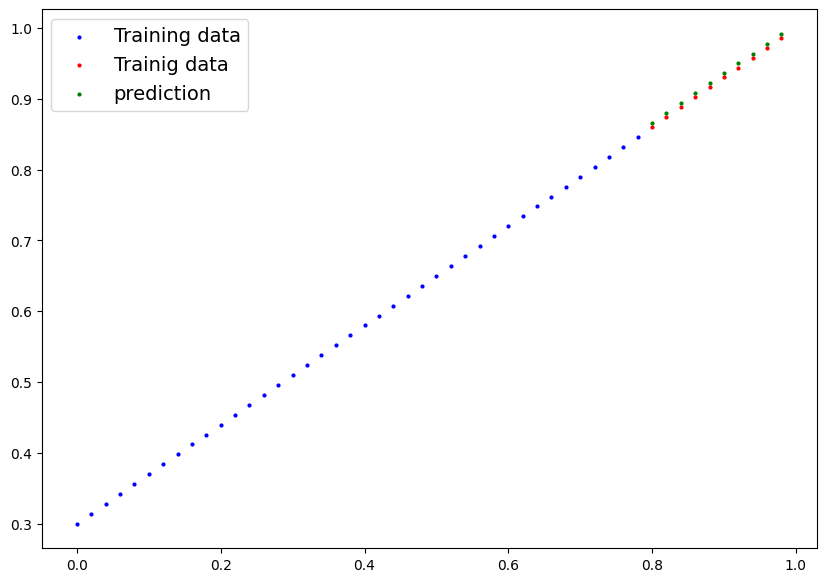

In [33]:
plot(predictions=y_new_preds)

In [34]:
import numpy as np


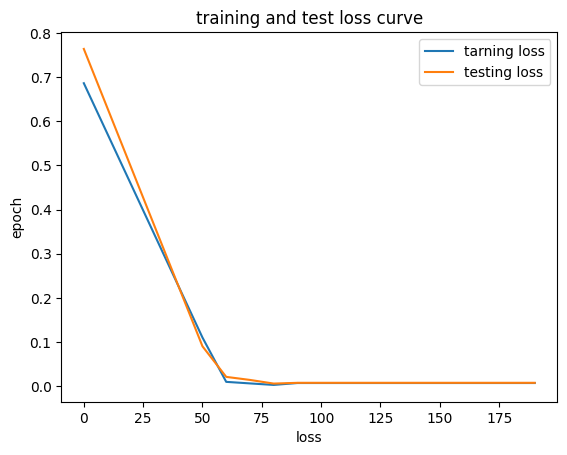

In [24]:
plt.plot(epoch_count, np.array(torch.tensor(train_losss).numpy()), label = "tarning loss")
plt.plot(epoch_count, np.array(torch.tensor(test_losss).numpy()), label = "testing loss")
plt.title("training and test loss curve")
plt.ylabel("epoch")
plt.xlabel("loss")
plt.legend();

In [35]:
torch.save(model_0,"/content/sample_data/model_0" )

In [36]:
# saving the model in pytorch

# saving

path = "/content/sample_data/model_0"

torch.save(model_0,path)

# loading

model = torch.load(path)

model.eval()

LinearRegressionModel()

In [37]:
model(100000)

tensor([69767.2891], grad_fn=<AddBackward0>)

In [38]:
0.7 * 100000 + 0.3 ##just checking the previous wieghts and bias

70000.3

In [29]:
##end